This notebook contains functionality to perform the following:

Look at scoring, visualizations, and correlation maps between y_true and y_pred for each of 10 sequential cross validation folds and the hidra.tsv (canola organelle) dataset. This is done separately for chloroplast and mitochondrion data. We also look at the CG content and the target value summary statisics for each.

In [ ]:
# mount google drive

from google.colab import drive
drive.mount('/content/drive')

%cd '/content/drive/Shareddrives/NRC_Amii_Agronomics_Project/nrc-ml-plant-genomics/'

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

from scipy.stats import spearmanr # https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.spearmanr.html

In [ ]:
# read in dataframe
df_target = pd.read_csv('data/raw/hidra.tsv', sep="\t", header=None)
# df_target.columns = ["sequence", "target_value"]

In [ ]:
# read in node values from MPRA-DragoNN repo model
df_input = pd.read_csv('data/processed/CanolaTargetsKeras.csv', index_col=0)

In [ ]:
df = pd.concat([df_target, df_input], axis=1)

---
### Chloroplast

In [ ]:
df = pd.concat([df_target, df_input], axis=1)

In [ ]:
df = df[df[0] == "NC_016734.1"]  # select chloroplast

In [ ]:
df.shape

(30544, 21)

In [ ]:
df.head()

,0,1,2,3,4,5,6,7,8,node1,...,node3,node4,node5,node6,node7,node8,node9,node10,node11,node12
0,NC_016734.1,0,145,AATCATAATAACTTGGTCCCGGGCATCACGGGCGAACGACGGGAAT...,998,316,338.31,405.52,0.26,0.057192,...,0.069417,-0.091350,-0.131828,-0.127457,0.030535,-0.072821,-0.022544,-0.048606,-0.120532,-0.104665
1,NC_016734.1,5,150,TAATAACTTGGTCCCGGGCATCACGGGCGAACGACGGGAATTGAAC...,998,318,338.31,408.08,0.27,0.248029,...,0.328560,0.129749,-0.002474,0.077467,0.338646,0.145675,0.296574,-0.016733,0.063365,0.017852
2,NC_016734.1,10,155,ACTTGGTCCCGGGCATCACGGGCGAACGACGGGAATTGAACCCGCG...,998,318,338.31,408.08,0.27,0.265661,...,0.289731,-0.020528,0.083776,0.045066,0.355833,0.135057,0.296520,0.133751,0.213709,0.198023
3,NC_016734.1,15,160,GTCCCGGGCATCACGGGCGAACGACGGGAATTGAACCCGCGATGGT...,998,318,338.31,408.08,0.27,0.369960,...,0.464377,0.072154,0.109099,0.109804,0.366931,0.279233,0.396484,0.112758,0.254343,0.209659
4,NC_016734.1,20,165,GGGCATCACGGGCGAACGACGGGAATTGAACCCGCGATGGTGAATT...,998,318,338.31,408.08,0.27,0.371398,...,0.480646,0.084766,0.002434,0.055888,0.410235,0.252205,0.403355,0.126558,0.134649,0.152153


In [ ]:
chunks = np.array_split(df, 10)
train_r2 = []
test_r2 = []
train_spearman = []
test_spearman = []
test_preds = []
train_preds = []

for i in range(len(chunks)):  # treating each fold as the test set
    print(i)
    
    test = chunks[i]  # pick ith chunk as test set
    X_test = np.array(test[["node"+str(i) for i in range(1,13)]])
    y_test =  np.array(test[8])
    
    train = pd.concat([fold for j, fold in enumerate(chunks) if i!=j])
    X_train = np.array(train[["node"+str(i) for i in range(1,13)]])
    y_train = np.array(train[8])
    
    reg = LinearRegression().fit(X_train, y_train)  # train linear regression
    
    print("Train R^2:", reg.score(X_train, y_train))  # coefficient of determination R^2
    train_r2.append(reg.score(X_train, y_train))
    
    print("Test  R^2:", reg.score(X_test, y_test))  # coefficient of determination R^2
    test_r2.append(reg.score(X_test, y_test))
    
    y_pred = reg.predict(X_train)
    train_spearman.append(spearmanr(y_train, y_pred)[0])
    print("Train Spearman:", spearmanr(y_train, y_pred)[0])  # spearman coefficient
    
    train_preds.append((y_train, y_pred))
          
    y_pred = reg.predict(X_test)
    test_spearman.append(spearmanr(y_test, y_pred)[0])
    print("Test  Spearman:", spearmanr(y_test, y_pred)[0]) # spearman coefficient
    
    test_preds.append((y_test, y_pred))
        
    print()

0
Train R^2: 0.2552842960165914
Test  R^2: -4.341285045674539
Train Spearman: 0.5112972387652894
Test  Spearman: 0.4040082116750898

1
Train R^2: 0.26096734016507406
Test  R^2: -0.14568140138339158
Train Spearman: 0.5179817458284607
Test  Spearman: 0.44449345013513225

2
Train R^2: 0.27364429880394936
Test  R^2: -1.7004310679118424
Train Spearman: 0.5382998523531227
Test  Spearman: 0.37423283412200714

3
Train R^2: 0.25503613307500994
Test  R^2: 0.09855655308521838
Train Spearman: 0.5096203295183466
Test  Spearman: 0.510097473279192

4
Train R^2: 0.2541298989708982
Test  R^2: -0.7359144298441267
Train Spearman: 0.5142665501659651
Test  Spearman: 0.36930708915489296

5
Train R^2: 0.26411413607607404
Test  R^2: -0.3718584272261838
Train Spearman: 0.5156809710565231
Test  Spearman: 0.42889371512814745

6
Train R^2: 0.2034521033889194
Test  R^2: -1.1013204380708816
Train Spearman: 0.4463566833079904
Test  Spearman: 0.5571684294019276

7
Train R^2: 0.2818557021812672
Test  R^2: -0.127668498

In [ ]:
print("Test R2 mean: %.3f"%np.mean(test_r2))
print("Test R2 std dev: %.3f"%np.std(test_r2))
print()
print("Train R2 mean: %.3f"%np.mean(train_r2))
print("Train R2 std dev: %.3f"%np.std(train_r2))
print()
print("Test Spearman mean: %.3f"%np.mean(test_spearman))
print("Test Spearman std dev :%.3f"%np.std(test_spearman))
print()
print("Train Spearman mean: %.3f"%np.mean(train_spearman))
print("Train Spearman std dev: %.3f"%np.std(train_spearman))

Test R2 mean: -1.165
Test R2 std dev: 1.271

Train R2 mean: 0.253
Train R2 std dev: 0.021

Test Spearman mean: 0.425
Test Spearman std dev :0.080

Train Spearman mean: 0.507
Train Spearman std dev: 0.026


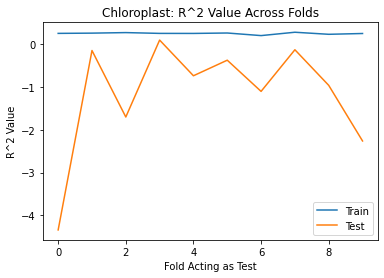

In [ ]:
# generate R2 by fold plot

fig = plt.figure()

fig.patch.set_facecolor('white')

plt.plot(train_r2)
plt.plot(test_r2)
plt.legend(["Train", "Test"])
plt.title("Chloroplast: R^2 Value Across Folds")
plt.xlabel("Fold Acting as Test")
plt.ylabel("R^2 Value")
plt.show()

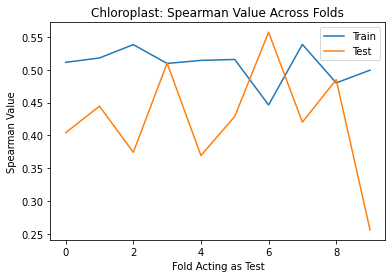

In [ ]:
# generate spearman by fold plot

fig = plt.figure()

fig.patch.set_facecolor('white')

plt.plot(train_spearman)
plt.plot(test_spearman)
plt.legend(["Train", "Test"])
plt.title("Chloroplast: Spearman Value Across Folds")
plt.xlabel("Fold Acting as Test")
plt.ylabel("Spearman Value")
plt.show()

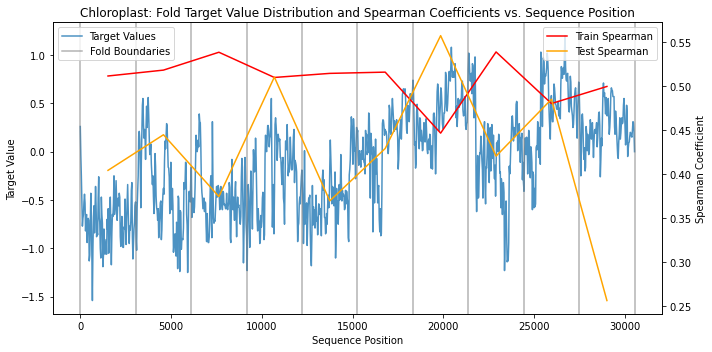

In [ ]:
# generate plot with fold boundaries, target values, and train/test spearman values

fig, ax1 = plt.subplots(figsize=(10, 5))

fig.patch.set_facecolor('white')

xcoords = [df.index[-1] for df in chunks]

color = 'tab:blue'
ax1.set_xlabel('Sequence Position')
ax1.set_ylabel('Target Value')
ax1.plot(df.iloc[::n, 8], alpha=0.8)
ax1.tick_params(axis='y')

for xc in [chunks[0].index[0]] + xcoords:
    plt.axvline(x=xc, color="grey", alpha=0.6)

ax1.legend(["Target Values", "Fold Boundaries"])

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:red'
ax2.set_ylabel('Spearman Coefficient')  # we already handled the x-label with ax1
ax2.plot([xc-int((xcoords[1]-xcoords[0])/2) for xc in xcoords], train_spearman, color="red")
ax2.plot([xc-int((xcoords[1]-xcoords[0])/2) for xc in xcoords], test_spearman, color="orange")
ax2.tick_params(axis='y')

ax2.legend(["Train Spearman", "Test Spearman"])

plt.title("Chloroplast: Fold Target Value Distribution and Spearman Coefficients vs. Sequence Position")

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

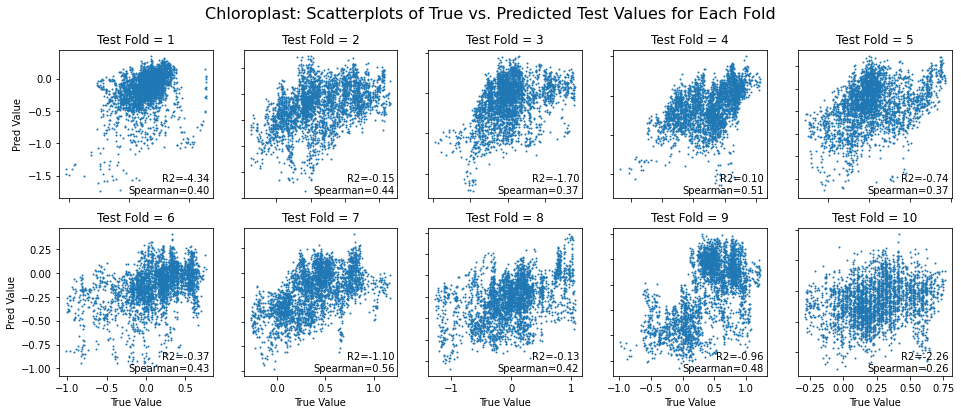

In [ ]:
# generate the test y_true vs y_pred scatterplots for each fold

fig, axs = plt.subplots(2, 5, figsize=(16,6))

fig.patch.set_facecolor('white')

for i in range(2):
    for j in range(5):
        fold_num = i*5+j
        axs[i][j].scatter(test_preds[fold_num][0], test_preds[fold_num][1], s=1)
        axs[i][j].set_title('Test Fold = '+str(fold_num+1))
        axs[i][j].text(0.98, 0.02, 'Spearman=%.2f'%test_spearman[fold_num], horizontalalignment='right', verticalalignment='bottom', transform=axs[i][j].transAxes)
        axs[i][j].text(0.98, 0.1, 'R2=%.2f'%test_r2[fold_num], horizontalalignment='right', verticalalignment='bottom', transform=axs[i][j].transAxes)

for ax in axs.flat:
    ax.set(xlabel='True Value', ylabel='Pred Value')

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()
    
fig.suptitle('Chloroplast: Scatterplots of True vs. Predicted Test Values for Each Fold', fontsize=16)
plt.show()

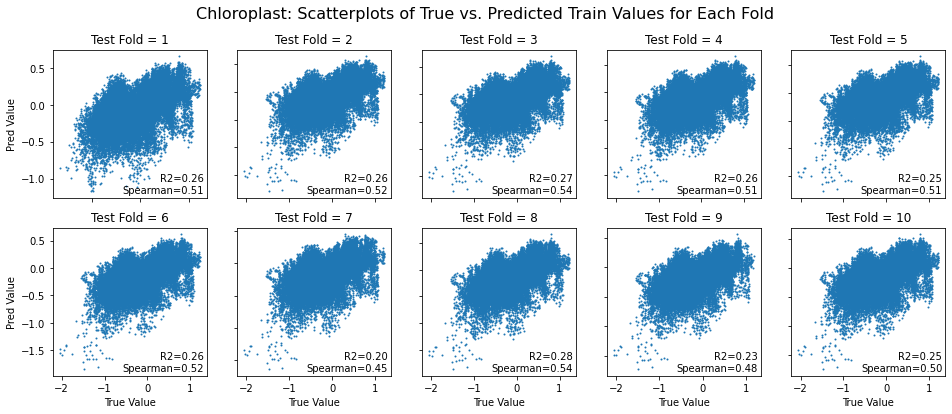

In [ ]:
# generate the train y_true vs y_pred scatterplots for each fold

fig, axs = plt.subplots(2, 5, figsize=(16,6))

fig.patch.set_facecolor('white')

for i in range(2):
    for j in range(5):
        fold_num = i*5+j
        axs[i][j].scatter(train_preds[fold_num][0], train_preds[fold_num][1], s=1)
        axs[i][j].set_title('Test Fold = '+str(fold_num+1))
        axs[i][j].text(0.98, 0.02, 'Spearman=%.2f'%train_spearman[fold_num], horizontalalignment='right', verticalalignment='bottom', transform=axs[i][j].transAxes)
        axs[i][j].text(0.98, 0.1, 'R2=%.2f'%train_r2[fold_num], horizontalalignment='right', verticalalignment='bottom', transform=axs[i][j].transAxes)

        
for ax in axs.flat:
    ax.set(xlabel='True Value', ylabel='Pred Value')

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()
    
fig.suptitle('Chloroplast: Scatterplots of True vs. Predicted Train Values for Each Fold', fontsize=16)
plt.show()

---
### Mitochondrion

In [ ]:
df = pd.concat([df_target, df_input], axis=1)

In [ ]:
df = df[df[0] == "NC_008285.1"]

In [ ]:
df.shape

(44342, 21)

In [ ]:
df.head()

,0,1,2,3,4,5,6,7,8,node1,...,node3,node4,node5,node6,node7,node8,node9,node10,node11,node12
30544,NC_008285.1,0,145,CTGCAGTGCCTTCCCCCCCCTAGTCTAGACCGAGTATCAATAGTTG...,265,72,89.83,92.40,0.04,0.063575,...,0.149261,0.081778,-0.025158,0.035122,0.123482,0.121610,0.147521,-0.024234,0.074328,0.029143
30545,NC_008285.1,5,150,GTGCCTTCCCCCCCCTAGTCTAGACCGAGTATCAATAGTTGTAGTT...,274,77,92.88,98.81,0.09,0.153366,...,0.147161,0.152094,0.095178,0.148272,0.086009,0.034643,0.074733,0.033392,0.173583,0.116363
30546,NC_008285.1,10,155,TTCCCCCCCCTAGTCTAGACCGAGTATCAATAGTTGTAGTTCCTGT...,279,79,94.58,101.38,0.10,0.190854,...,0.269196,-0.076744,0.035132,-0.021981,0.290463,0.139741,0.261366,0.008664,0.132554,0.081481
30547,NC_008285.1,15,160,CCCCCTAGTCTAGACCGAGTATCAATAGTTGTAGTTCCTGTCCGTT...,281,81,95.26,103.95,0.13,0.052459,...,0.094528,0.124571,-0.002700,0.072533,0.273279,0.083440,0.216298,0.039614,0.033512,0.037812
30548,NC_008285.1,20,165,TAGTCTAGACCGAGTATCAATAGTTGTAGTTCCTGTCCGTTATGGA...,285,81,96.61,103.95,0.11,0.082054,...,0.117739,-0.051672,-0.070715,-0.073848,0.041789,-0.091954,-0.028462,0.006767,0.022917,0.012605


In [ ]:
chunks = np.array_split(df, 10)
train_r2 = []
test_r2 = []
train_spearman = []
test_spearman = []
test_preds = []
train_preds = []

for i in range(len(chunks)):
    print(i)
    
    test = chunks[i]
    X_test = np.array(test[["node"+str(i) for i in range(1,13)]])
    y_test =  np.array(test[8])
    
    train = pd.concat([fold for j, fold in enumerate(chunks) if i!=j])
    X_train = np.array(train[["node"+str(i) for i in range(1,13)]])
    y_train = np.array(train[8])
    
    reg = LinearRegression().fit(X_train, y_train)
    
    print("Train R^2:", reg.score(X_train, y_train))  # coefficient of determination R^2
    train_r2.append(reg.score(X_train, y_train))
    
    print("Test  R^2:", reg.score(X_test, y_test))  # coefficient of determination R^2
    test_r2.append(reg.score(X_test, y_test))
    
    y_pred = reg.predict(X_train)
    train_spearman.append(spearmanr(y_train, y_pred)[0])
    print("Train Spearman:", spearmanr(y_train, y_pred)[0])
    
    train_preds.append((y_train, y_pred))
          
    y_pred = reg.predict(X_test)
    test_spearman.append(spearmanr(y_test, y_pred)[0])
    print("Test  Spearman:", spearmanr(y_test, y_pred)[0])
    
    test_preds.append((y_test, y_pred))
        
    print()

0
Train R^2: 0.007302154684422302
Test  R^2: -0.012672651849252148
Train Spearman: 0.08834141232288888
Test  Spearman: -0.016846796059998052

1
Train R^2: 0.006123940475244227
Test  R^2: -0.17300047082130643
Train Spearman: 0.07745837768653524
Test  Spearman: 0.04055149698602581

2
Train R^2: 0.004080672182572798
Test  R^2: 0.016248442606659697
Train Spearman: 0.06778994457125437
Test  Spearman: 0.1602975432157056

3
Train R^2: 0.006045888707766678
Test  R^2: -0.07026480993406992
Train Spearman: 0.07898753849160582
Test  Spearman: 0.06671689699823391

4
Train R^2: 0.00660709488864597
Test  R^2: -0.10310672016947264
Train Spearman: 0.08431193433765523
Test  Spearman: 0.017059525059592552

5
Train R^2: 0.005875700249873939
Test  R^2: -1.09727941985176
Train Spearman: 0.07984712591611383
Test  Spearman: 0.01044733337007461

6
Train R^2: 0.004192679175321734
Test  R^2: 0.011042818009784128
Train Spearman: 0.06350729890138354
Test  Spearman: 0.19106136451280356

7
Train R^2: 0.0053473893717

In [ ]:
print("Test R2 mean: %.3f"%np.mean(test_r2))
print("Test R2 std dev: %.3f"%np.std(test_r2))
print()
print("Train R2 mean: %.3f"%np.mean(train_r2))
print("Train R2 std dev: %.3f"%np.std(train_r2))
print()
print("Test Spearman mean: %.3f"%np.mean(test_spearman))
print("Test Spearman std dev :%.3f"%np.std(test_spearman))
print()
print("Train Spearman mean: %.3f"%np.mean(train_spearman))
print("Train Spearman std dev: %.3f"%np.std(train_spearman))

Test R2 mean: -0.289
Test R2 std dev: 0.489

Train R2 mean: 0.006
Train R2 std dev: 0.002

Test Spearman mean: 0.046
Test Spearman std dev :0.084

Train Spearman mean: 0.080
Train Spearman std dev: 0.010


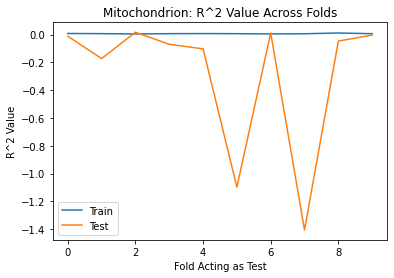

In [ ]:
fig = plt.figure()

fig.patch.set_facecolor('white')

plt.plot(train_r2)
plt.plot(test_r2)
plt.legend(["Train", "Test"])
plt.title("Mitochondrion: R^2 Value Across Folds")
plt.xlabel("Fold Acting as Test")
plt.ylabel("R^2 Value")
plt.show()

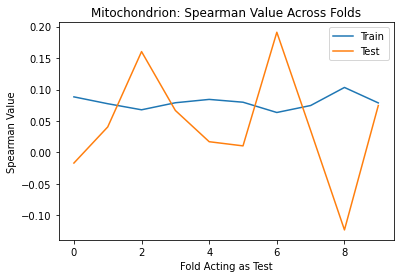

In [ ]:
fig = plt.figure()

fig.patch.set_facecolor('white')

plt.plot(train_spearman)
plt.plot(test_spearman)
plt.legend(["Train", "Test"])
plt.title("Mitochondrion: Spearman Value Across Folds")
plt.xlabel("Fold Acting as Test")
plt.ylabel("Spearman Value")
plt.show()

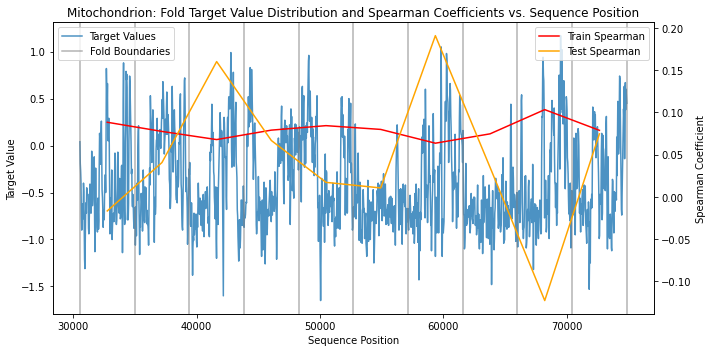

In [ ]:
fig, ax1 = plt.subplots(figsize=(10, 5))

fig.patch.set_facecolor('white')

xcoords = [df.index[-1] for df in chunks]

color = 'tab:blue'
ax1.set_xlabel('Sequence Position')
ax1.set_ylabel('Target Value')
ax1.plot(df.iloc[::n, 8], alpha=0.8)
ax1.tick_params(axis='y')

for xc in [chunks[0].index[0]] + xcoords:
    plt.axvline(x=xc, color="grey", alpha=0.6)

ax1.legend(["Target Values", "Fold Boundaries"])

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:red'
ax2.set_ylabel('Spearman Coefficient')  # we already handled the x-label with ax1
ax2.plot([xc-int((xcoords[1]-xcoords[0])/2) for xc in xcoords], train_spearman, color="red")
ax2.plot([xc-int((xcoords[1]-xcoords[0])/2) for xc in xcoords], test_spearman, color="orange")
ax2.tick_params(axis='y')

ax2.legend(["Train Spearman", "Test Spearman"])

plt.title("Mitochondrion: Fold Target Value Distribution and Spearman Coefficients vs. Sequence Position")

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

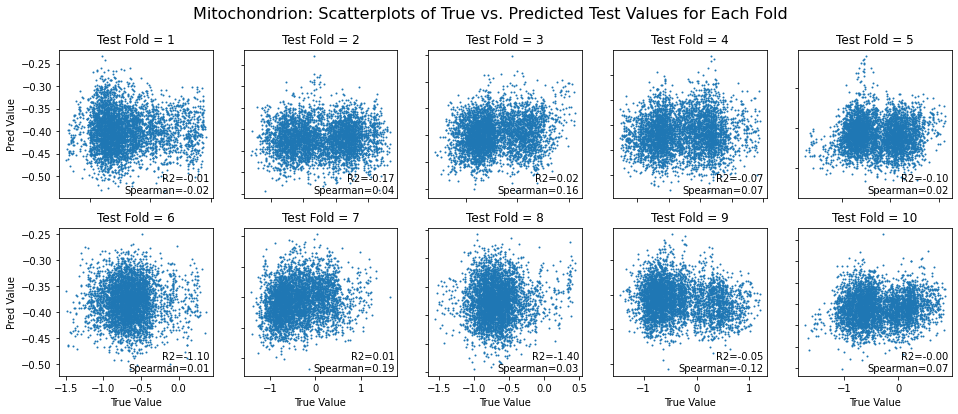

In [ ]:
fig, axs = plt.subplots(2, 5, figsize=(16,6))

fig.patch.set_facecolor('white')

for i in range(2):
    for j in range(5):
        fold_num = i*5+j
        axs[i][j].scatter(test_preds[fold_num][0], test_preds[fold_num][1], s=1)
        axs[i][j].set_title('Test Fold = '+str(fold_num+1))
        axs[i][j].text(0.98, 0.02, 'Spearman=%.2f'%test_spearman[fold_num], horizontalalignment='right', verticalalignment='bottom', transform=axs[i][j].transAxes)
        axs[i][j].text(0.98, 0.1, 'R2=%.2f'%test_r2[fold_num], horizontalalignment='right', verticalalignment='bottom', transform=axs[i][j].transAxes)

        
for ax in axs.flat:
    ax.set(xlabel='True Value', ylabel='Pred Value')

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()
    
fig.suptitle('Mitochondrion: Scatterplots of True vs. Predicted Test Values for Each Fold', fontsize=16)
plt.show()

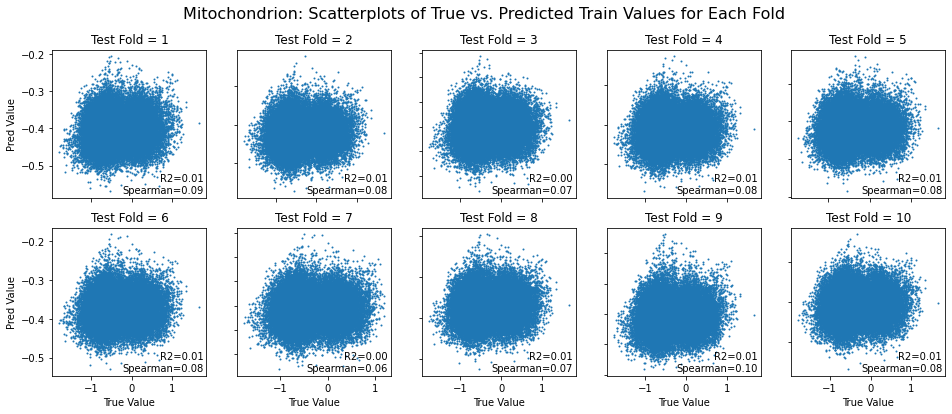

In [ ]:
fig, axs = plt.subplots(2, 5, figsize=(16,6))

fig.patch.set_facecolor('white')

for i in range(2):
    for j in range(5):
        fold_num = i*5+j
        axs[i][j].scatter(train_preds[fold_num][0], train_preds[fold_num][1], s=1)
        axs[i][j].set_title('Test Fold = '+str(fold_num+1))
        axs[i][j].text(0.98, 0.02, 'Spearman=%.2f'%train_spearman[fold_num], horizontalalignment='right', verticalalignment='bottom', transform=axs[i][j].transAxes)
        axs[i][j].text(0.98, 0.1, 'R2=%.2f'%train_r2[fold_num], horizontalalignment='right', verticalalignment='bottom', transform=axs[i][j].transAxes)

        
for ax in axs.flat:
    ax.set(xlabel='True Value', ylabel='Pred Value')

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()
    
fig.suptitle('Mitochondrion: Scatterplots of True vs. Predicted Train Values for Each Fold', fontsize=16)
plt.show()